In [ ]:
# ingest the data

In [3]:
import pandas as pd

In [5]:
data=pd.read_csv(r"C:\fsds_newproj\notebooks\data\train.csv")

In [6]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [7]:
data.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [9]:
data.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
113562,113562,0.39,Ideal,G,VS1,62.4,55.0,4.71,4.67,2.93,984
94364,94364,0.31,Good,I,SI1,63.7,54.0,4.38,4.34,2.77,537
169137,169137,1.20,Ideal,H,SI1,62.0,58.0,6.74,6.79,4.19,5831
88665,88665,0.31,Ideal,G,VS2,62.4,55.0,4.29,4.32,2.69,544
110858,110858,1.53,Ideal,G,SI1,62.3,55.0,7.36,7.40,4.61,12485


In [ ]:
# check the missing value

In [10]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [12]:
# here axis = 1 represents column,0 means row
data = data.drop(labels=["id"],axis=1)

In [13]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [14]:
data.duplicated().sum()

0

In [15]:
data.shape

(193573, 10)

In [16]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
193568    False
193569    False
193570    False
193571    False
193572    False
Length: 193573, dtype: bool

In [ ]:
# seggregating numerical and categorical data

In [19]:
categorical_column=data.columns[data.dtypes=='O']

In [20]:
numerical_column = data.columns[data.dtypes!='O']

In [21]:
data[categorical_column]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [22]:
data[numerical_column]

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [23]:
data[categorical_column].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [25]:
data[numerical_column].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [26]:
https://www.vrai.com/journal/post/diamond-cut

SyntaxError: invalid syntax (1540698364.py, line 1)

In [28]:
data[categorical_column]["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [29]:
data[categorical_column]["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [35]:
png_file = "notebooks/data/diamond_grades.png.png"

In [36]:
data[categorical_column]["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [37]:
data[categorical_column]["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

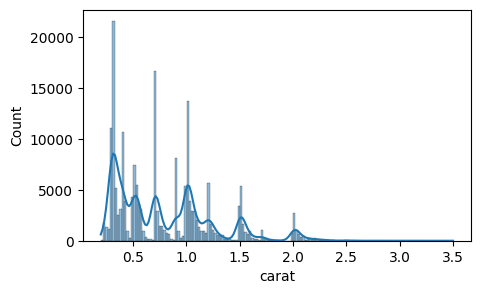

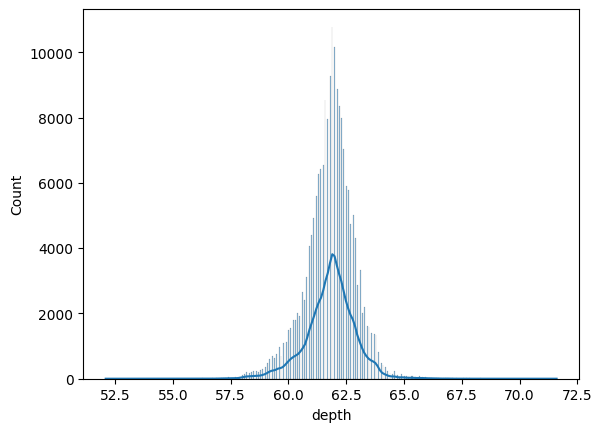

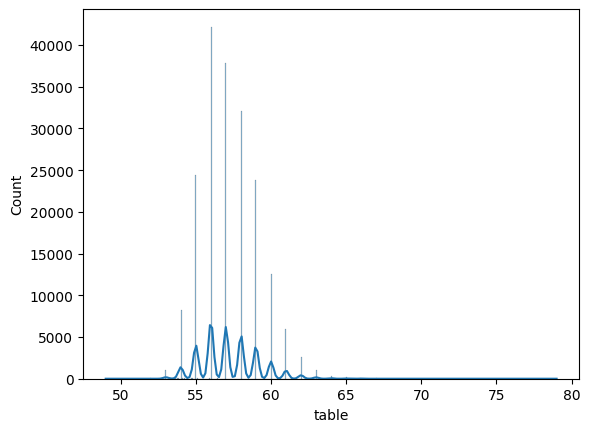

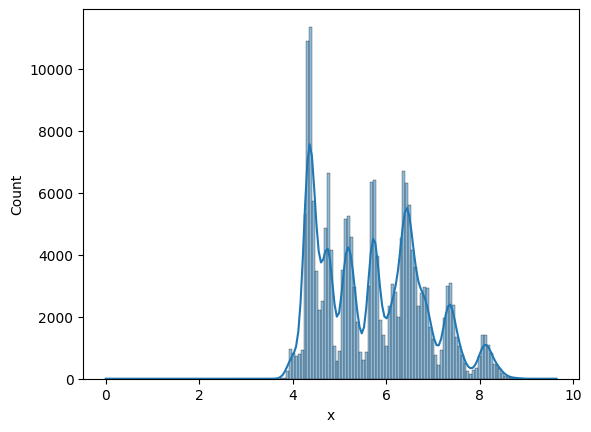

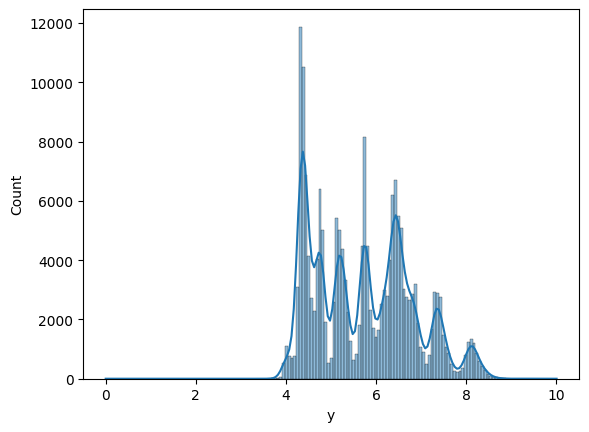

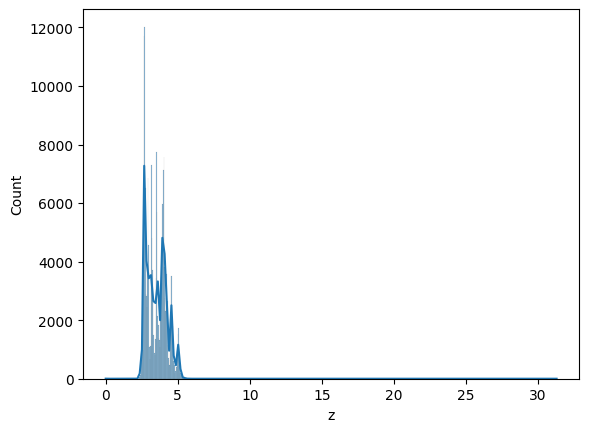

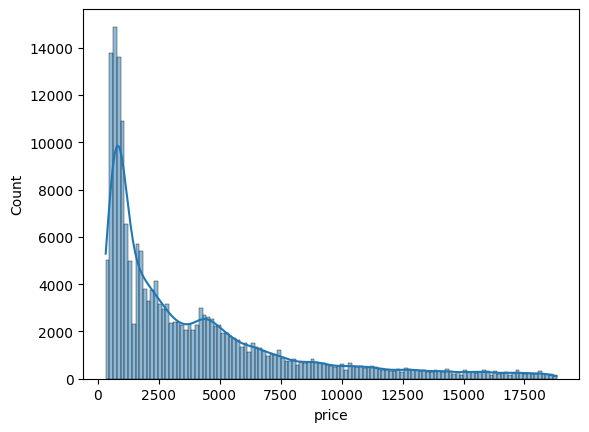

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
for col in numerical_column:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

In [ ]:
# barplot/countplot for categorical columns

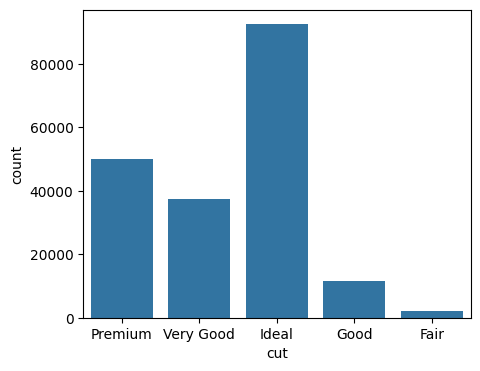

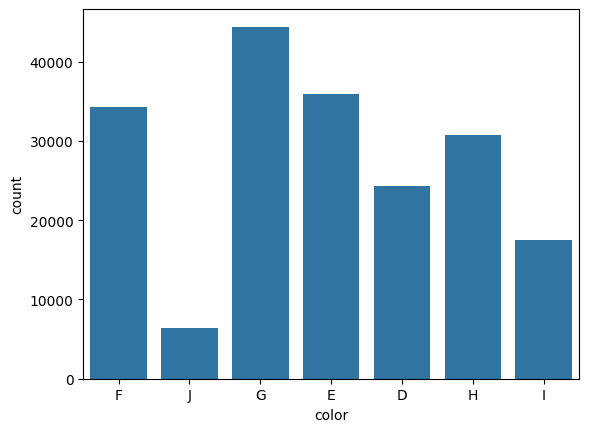

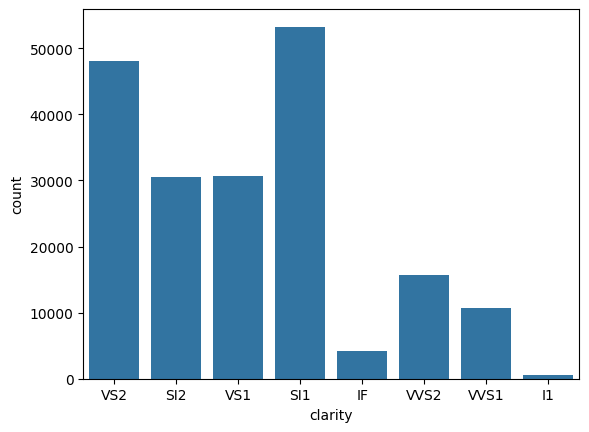

In [45]:
plt.figure(figsize=(5,4))
for col1 in categorical_column:
    sns.countplot(data=data,x=col1)
    print("\n")
    plt.show()

<Axes: >

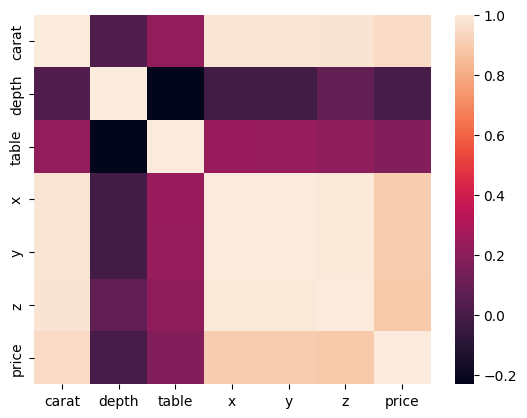

In [49]:
sns.heatmap(data[numerical_column].corr())

In [ ]:
# Feature Engineering

In [50]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [51]:
data["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [52]:
data["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [53]:
data["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [54]:
# it is ordinal encoding
cut_map = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
clarity_map = {'I1':1,'SI2':2,'SI1':3,'VS2':4,"VS1":5,"VVS2":6,'VVS1':7,'IF':8}
color_map ={'D':1,"E":2,"F":3,'G':4,'H':5,'I':6,'J':7}

In [62]:
data["cut"]=data["cut"].map(cut_map)

In [63]:
data["clarity"]=data["clarity"].map(clarity_map)

In [64]:
data["color"]=data["color"].map(color_map)

In [65]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681
